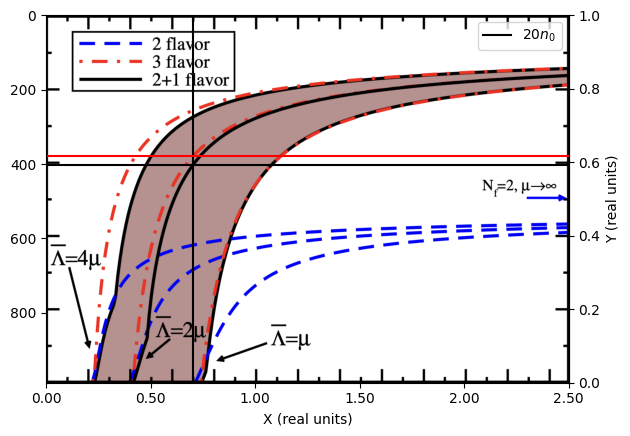

In [117]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Load image
image = mpimg.imread("less_quark_plot.png")
height, width = image.shape[:2]

# Real-world coordinates (from the paper plot)
x_real_min, x_real_max = 0, 2.5
y_real_min, y_real_max = 0, 1

fig, ax = plt.subplots()

# Show the image without flipping
ax.imshow(image, origin='upper')
ax.set_xlim(0, width)
ax.set_ylim(height, 0)

# ---- Map pixel X to real X ----
def pixel_to_real_x(x_pixel):
    return x_real_min + (x_pixel / width) * (x_real_max - x_real_min)

def real_x_to_pixel(x_real):
    return (x_real - x_real_min) / (x_real_max - x_real_min) * width

# ---- Map pixel Y to real Y (remember: origin='upper') ----
def pixel_to_real_y(y_pixel):
    return y_real_max - (y_pixel / height) * (y_real_max - y_real_min)

def real_y_to_pixel(y_real):
    return (y_real_max - y_real) / (y_real_max - y_real_min) * height

# ---- Set X ticks ----
x_ticks_real = np.linspace(x_real_min, x_real_max, 6)
x_ticks_pixel = [real_x_to_pixel(xr) for xr in x_ticks_real]
ax.set_xticks(x_ticks_pixel)
ax.set_xticklabels([f"{xr:.2f}" for xr in x_ticks_real])
ax.set_xlabel("X (real units)")

# ---- Secondary Y axis (right) with real units ----
from matplotlib.ticker import FuncFormatter

secax = ax.secondary_yaxis('right', functions=(pixel_to_real_y, real_y_to_pixel))
secax.set_ylabel("Y (real units)")

# Optional: set specific tick locations on the secondary axis
y_ticks_real = np.linspace(y_real_min, y_real_max, 6)
secax.set_ticks(y_ticks_real)

# try drawing a vertical line
x_line_real = 0.705  # Real value where you want to draw the line
x_line_pixel = real_x_to_pixel(x_line_real)
y_line_real_black = 0.594
y_line_pixel_black = real_y_to_pixel(y_line_real_black)
y_line_real_red = 0.618
y_line_pixel_red = real_y_to_pixel(y_line_real_red)

# Use ax.axhline to draw the horizontal line in data coordinates
ax.axvline(x_line_pixel, color='black', label=r'$20n_0$')
ax.axhline(y_line_pixel_black, color='black')
ax.axhline(y_line_pixel_red, color='red')

plt.tight_layout()
plt.legend()
plt.show()

In [129]:
# print the results!
print('The value of the black curve (2 massless + 1 massive quark) at 0.705 GeV is {}.'\
      .format(y_line_real_black))
print('The value of the red curve (3 massless quarks) at 0.705 GeV is {}.'.format(y_line_real_red))
print('The difference between these two values is {}.'.format(y_line_real_red-y_line_real_black))
print('The percent difference between these two values is {}%.'\
      .format(100*np.abs(y_line_real_black-y_line_real_red)/(y_line_real_black+y_line_real_red)))

The value of the black curve (2 massless + 1 massive quark) at 0.705 GeV is 0.594.
The value of the red curve (3 massless quarks) at 0.705 GeV is 0.618.
The difference between these two values is 0.02400000000000002.
The percent difference between these two values is 1.980198019801982%.
